<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/OSI-SAF_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_3f_OSI_SAF_sea_ice_plotting_Ice_Index.ipynb" target="_blank"><< Plotting OSI SAF sea ice index</a>

<font color="#138D75">**EUMETSAT OSI SAF Training Service**</font> <br>
**Copyright:** 2026 EUMETSAT <br>
**License:** MIT

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-osi-saf-sea-ice/HEAD?labpath=1_OSI_SAF_sea_ice_introductory%2F1_4_OSI_SAF_sea_ice_THREDDS.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h3>Learn OSI SAF sea ice parameters : Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has no prequisites.

</div>
<hr>

# 1.4 Accessing OSI SAF sea ice data via THREDDS
### Data used 

| Dataset | EUMETSAT collection ID | OSI SAF website description | OSI SAF identifier |
|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| Global Sea Ice Concentration (SSMIS) | EO:EUM:DAT:DMSP:OSI-401-B | <a href="https://osi-saf.eumetsat.int/products/osi-401-b" target="_blank">Description</a>   | OSI-401-B |


### Learning outcomes

At the end of this notebook you will know;
* How to use THREDDS instead of FTP
* How to open Sea Ice Concentration netcdf
* Map Sea Ice Concentration using cartopy 

<div class="alert alert-info" role="alert">

## <a id='TOC-TOP'></a>Contents

</div>
    
 1. [Access Sea Ice data using THREDDS](#section1)
 1. [Explore Sea Ice Data files using THREDDS](#section2)
 1. [Map Sea Ice Data files using THREDDS](#section2)


<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
# library imports 
import os                                           # a library that allows us access to basic operating system commands
import xarray as xr                                 # a library that supports the use of multi-dimensional arrays in Python
import matplotlib.pyplot as plt                     # a library that supports plotting
import matplotlib.cm as mpl_cm                      # a part of the plotting library that provides colour maps
import cmcrameri                                    # scientific colormaps for data visualisation
import cartopy.crs as ccrs                          # a mapping library that supports reprojection
import cartopy.feature as cfeature                  # a part of the mapping library that provides features such as coastlines
import warnings                                     # a library that controls python warningsaps for data visualisation

from pydap.client import open_url                   # a library that allows us to work with URL
import warnings                                     # a library that controls python warnings
warnings.filterwarnings('ignore')

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Access Sea Ice data using THREDDS
[Back to top](#TOC-TOP)

</div>

An alternative solution to FTP data download is to use data served from the THREDDS server from the OSI SAF High Latitude Centre. The THREDDS server allows you to directly access selected dataset without downloading them and does not recquire any authentification.

Many data sets are available (for a full list see; https://thredds.met.no/thredds/osisaf/osisaf.html). We will explore the last available AMSR2 based sea ice concentration data set.<br>
Let's first define the previous day date, and use it to define the URL of the corresponding dataset.

In [2]:
from datetime import date, timedelta

current_date = date.today()

file_date = date.today() - timedelta(1)

file_year =  str(file_date.year)
file_month =  "{:02d}".format(file_date.month)
file_day =  "{:02d}".format(file_date.day)

file_url = "https://thredds.met.no/thredds/dodsC/osisaf/met.no/ice/amsr2_conc/"+file_year+"/"+file_month+"/ice_conc_nh_polstere-100_amsr2_"+file_year+file_month+file_day+"1200.nc"

print("today is the:", current_date)
print("we will look for the file:",file_url)

today is the: 2026-02-16
we will look for the file: https://thredds.met.no/thredds/dodsC/osisaf/met.no/ice/amsr2_conc/2026/02/ice_conc_nh_polstere-100_amsr2_202602151200.nc


We can now simply open the NetCDF.

In [3]:
data_store = xr.backends.PydapDataStore(open_url(file_url))
nc = xr.open_dataset(data_store)

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Explore Sea Ice Data files using THREDDS
[Back to top](#TOC-TOP)

</div>

To explore the dataset you can now simply do the following :

In [4]:
nc

<xarray.Dataset> Size: 34MB
Dimensions:                   (time: 1, nv: 2, xc: 760, yc: 1120)
Coordinates:
  * time                      (time) datetime64[ns] 8B 2026-02-15T12:00:00
  * xc                        (xc) float64 6kB -3.845e+03 ... 3.745e+03
  * yc                        (yc) float64 9kB 5.845e+03 ... -5.345e+03
    lat                       (yc, xc) float32 3MB ...
    lon                       (yc, xc) float32 3MB ...
Dimensions without coordinates: nv
Data variables:
    Polar_Stereographic_Grid  int32 4B ...
    time_bnds                 (time, nv) datetime64[ns] 16B ...
    ice_conc                  (time, yc, xc) float64 7MB ...
    raw_ice_conc_values       (time, yc, xc) float64 7MB ...
    status_flag               (time, yc, xc) float32 3MB ...
    total_uncertainty         (time, yc, xc) float32 3MB ...
    smearing_uncertainty      (time, yc, xc) float32 3MB ...
    algorithm_uncertainty     (time, yc, xc) float32 3MB ...
Attributes: (12/30)
    title:                   Level-3 Sea Ice Concentration Analysis (AMSR2) f...
    product_id:              OSI-408-a
    instrument_type:         AMSR2
    platform_name:           GCOM-W
    easternmost_longitude:   180.0
    westernmost_longitude:   -180.0
    ...                      ...
    references:              Product User Manual and Algorithm Theoretical Ba...
    history:                 Created 2026-02-16 02:01:07
    product_version:         4.1
    software_version:        2.0.4
    netcdf_version:          1.5.4
    Conventions:             CF-1.6

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Map sea ice data files using THREDDS
[Back to top](#TOC-TOP)

</div>

Choose a colormap for your data set. You can find more information on matplotlib colormaps <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html" target="_blank">here</a>.   
However, we recommend you have a look at <a href=" https://matplotlib.org/cmocean/" target="_blank">cmocean colormaps</a> or that you use scientific colormaps for data visulaisation from librairies such as cmcrameri.

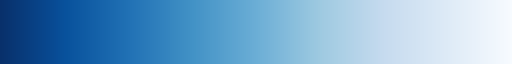

In [5]:
cmap = mpl_cm.get_cmap('Blues_r')
cmap.set_bad('grey')

cmap

Let's map the data in its original projection

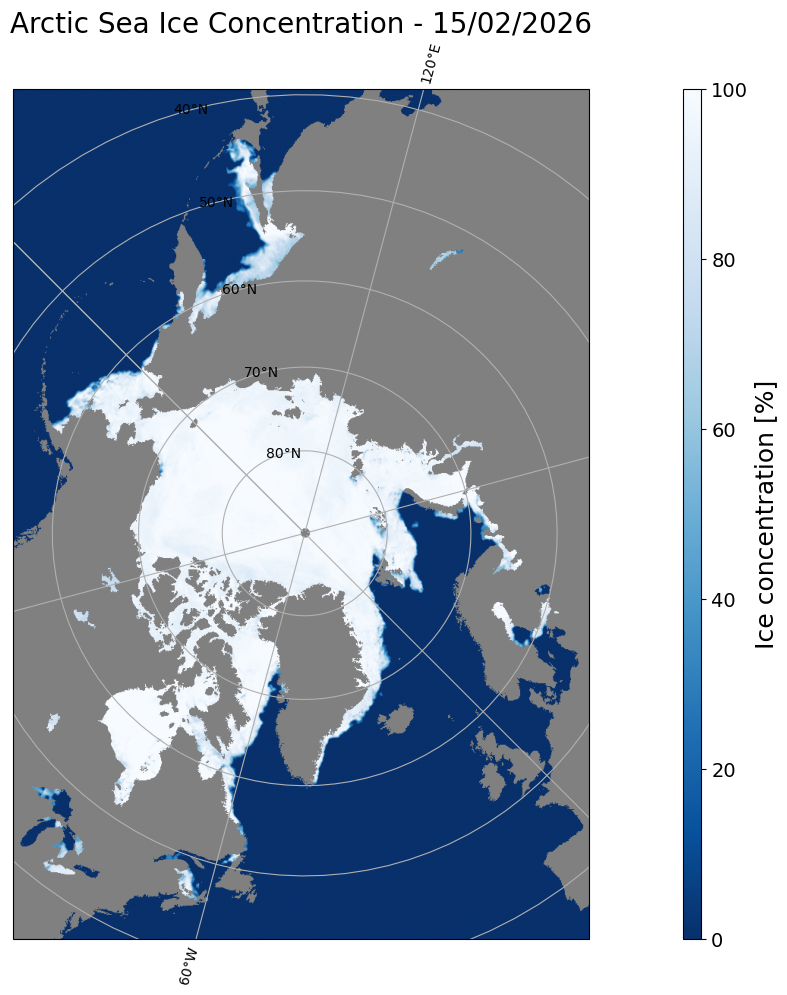

In [6]:
fig = plt.figure(figsize=(9,10))

# set data projection and request output projection
data_projection=ccrs.Stereographic(central_latitude=90.0, central_longitude=-45.0, true_scale_latitude=70.0)
output_projection=ccrs.Stereographic(central_latitude=90.0, central_longitude=-45.0, true_scale_latitude=70.0)

# define plot carateristics
ax = plt.axes([0.05,0.05,0.75,0.85], projection=output_projection)
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor=cmap(0)) # Change color of ocean
ax.add_feature(cfeature.LAND, zorder=0, facecolor='grey')  # Change color of land
ax.gridlines(draw_labels=True)   # Add grid line with latitude and logitude label 

# plot data
nc = xr.open_dataset(data_store)
xc = nc.variables['xc'][:] 
yc = nc.variables['yc'][:]
ice_conc = nc.variables['ice_conc'][:]

        
# Sea Ice Concentration data is provided in x y coordinates, bounds need to be defined for cartopy
bounds=(xc.min()*1000,xc.max()*1000,yc.min()*1000,yc.max()*1000)
        
# plotting sea ice
im = ax.imshow(ice_conc[0,:,:], transform=data_projection, extent=bounds, origin='upper', cmap=cmap)

# Adding title
plt.title("Arctic Sea Ice Concentration - "+file_day+"/"+file_month+"/"+file_year, fontsize=20)

# Adding a colorbar
axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('Ice concentration [%]', fontsize=18)
cb.ax.tick_params(labelsize=14)


Close the netcdf file.

In [7]:
nc.close()

<hr>
<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_3f_OSI_SAF_sea_ice_plotting_Ice_Index.ipynb" target="_blank"><< Plotting OSI SAF sea ice index</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>